**CODSOFT INTERNSHIP**

**TASK 1 : TITANIC SURVIVAL PREDICTION**

---



**TASK DESCRIPTION:**
*  Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
*  The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.


---




Importing the Required Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

Loading the given Dataset:

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dataset Information:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Checking Missing Values:

In [4]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Data Cleaning:

Data from the dataset is cleaned by:
1.   Filling the missing values in Age.
2.   Dropped Cabin column (because of too many missing values).
3.   Filling missing values in Embarked.



In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median()) #Data Cleaning: Step 1

In [6]:
df = df.drop(columns=['Cabin']) #Data Cleaning: Step 2

In [7]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  #Data Cleaning: Step 3

Graph for Survival Count of Passengers:

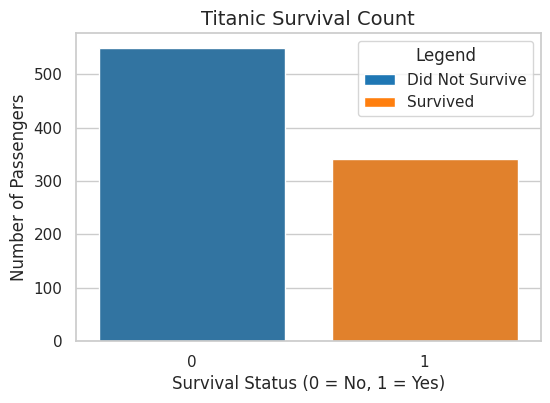

In [10]:
from matplotlib.patches import Patch
plt.figure(figsize=(6,4))
sns.countplot(
    x='Survived',
    hue='Survived',
    data=df,
    palette=['#1f77b4', '#ff7f0e'],
    legend=False
)
plt.title("Titanic Survival Count", fontsize=14)
plt.xlabel("Survival Status (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
legend_elements = [
    Patch(facecolor='#1f77b4', label='Did Not Survive'),
    Patch(facecolor='#ff7f0e', label='Survived')
]
plt.legend(handles=legend_elements, title="Legend")
plt.show()

Graph for Survival vs Passenger Class:

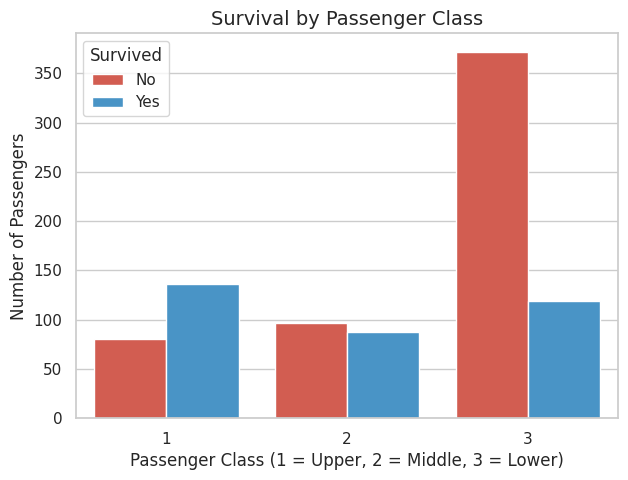

In [11]:
plt.figure(figsize=(7,5))
sns.countplot(
    x='Pclass',
    hue='Survived',
    data=df,
    palette=['#e74c3c', '#3498db']
)
plt.title("Survival vs Passenger Class", fontsize=14)
plt.xlabel("Passenger Class (1 = Upper, 2 = Middle, 3 = Lower)")
plt.ylabel("Number of Passengers")
plt.legend(
    title="Survived",
    labels=["No", "Yes"]
)
plt.show()

Graph for Survival vs Gender:

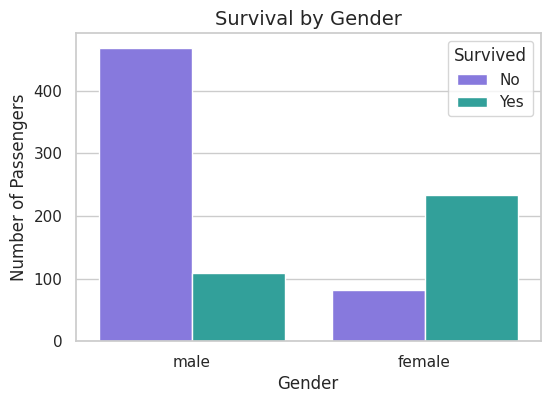

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(
    x='Sex',
    hue='Survived',
    data=df,
    palette=['#7b68ee', '#20b2aa']
)
plt.title("Survival by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")

plt.legend(
    title="Survived",
    labels=["No", "Yes"]
)
plt.show()

Graph for Age distribution of the Passengers:

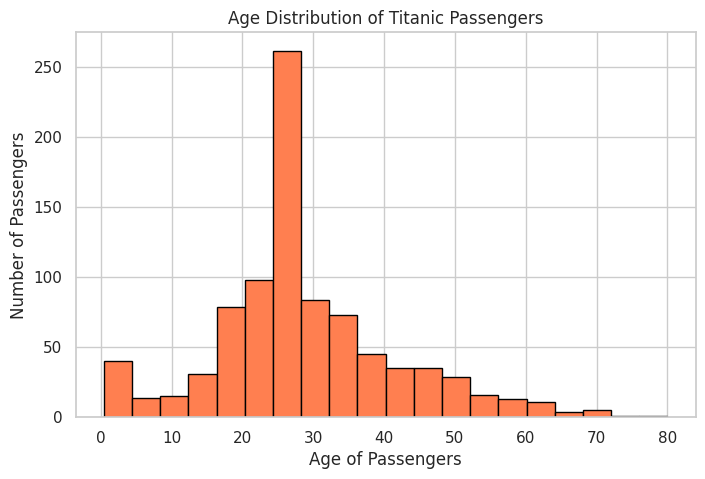

In [18]:
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=20, color='#FF7F50', edgecolor='black')
plt.xlabel("Age of Passengers")
plt.ylabel("Number of Passenger's")
plt.title("Age Distribution of Titanic Passengers")
plt.show()

Graph of Avg Fare paid Vs Survival:

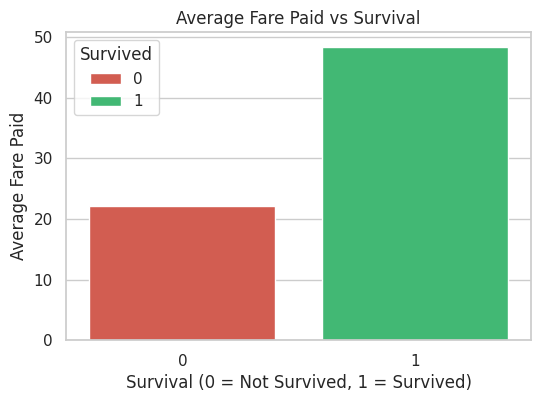

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.barplot(
    x='Survived',
    y='Fare',
    hue='Survived',
    data=df,
    palette=['#e74c3c', '#2ecc71'],
    errorbar=None
)
plt.xlabel("Survival (0 = Not Survived, 1 = Survived)")
plt.ylabel("Average Fare Paid")
plt.title("Average Fare Paid vs Survival")
plt.show()

Converting the required values into numerical data:

In [21]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Selecting the feature required (x) and target variable (y) :

In [42]:
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
y = df['Survived']

Train and Split :

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Building the Model

In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    solver='liblinear',
    max_iter=2000,
    class_weight='balanced'
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, solver='liblinear')

Checking for the accuracy using the Model :
Model Accuracy= 80%

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       105
           1       0.73      0.84      0.78        74

    accuracy                           0.80       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.80      0.81       179



Creation of Confusion Matrix :

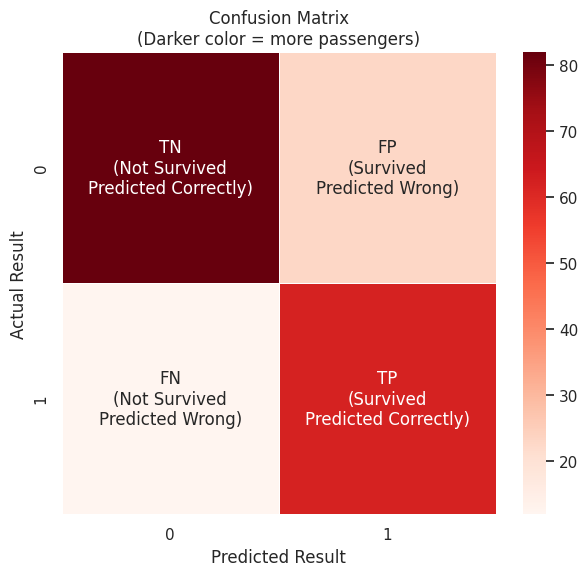

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
labels = np.array([
    ["TN\n(Not Survived\nPredicted Correctly)", "FP\n(Survived\nPredicted Wrong)"],
    ["FN\n(Not Survived\nPredicted Wrong)", "TP\n(Survived\nPredicted Correctly)"]
])
plt.figure(figsize=(7, 6))
sns.heatmap(
    cm,
    annot=labels,
    fmt="",
    cmap="Reds",
    cbar=True,
    linewidths=0.5
)

plt.title("Confusion Matrix\n(Darker color = more passengers)", fontsize=12)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
plt.show()